# Objective:

Designing a 12 hours ahead water inflow forecast.

In [ ]:
import numpy as np
import pandas as pd

from operator import itemgetter
from typing import List
from darts import TimeSeries
from darts.models import NaiveMovingAverage

from testing_functions import compute_errors, get_rmse, get_mape

Total number of usable samples 8095


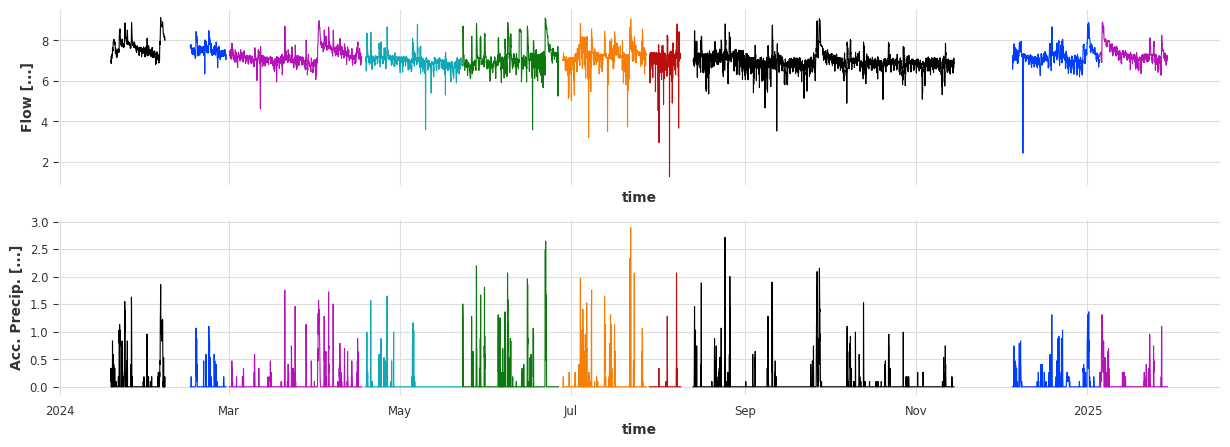

In [2]:
%run data_split.ipynb

train_getter: itemgetter = train_getter  # type: ignore # noqa: F821
test_getter: itemgetter = test_getter  # type: ignore # noqa: F821
target_subseries: List[TimeSeries] = target_subseries  # type: ignore # noqa: F821
expanded_covariates: List[TimeSeries] = expanded_covariates  # type: ignore # noqa: F821

## Modelling

In [ ]:
output_chunk_length = 12
test_target = test_getter(target_subseries)

### Baseline

In [ ]:
n_lags = 6
naive = NaiveMovingAverage(input_chunk_length=n_lags)

- At every step of the test series, we forecast the next 12 hours and compare.
- Since we have transformed the data during the [feature engineering](./feature_engineering.ipynb), we need to undo the transform with `np.expm1`

In [6]:
naive_errors = compute_errors(
    test_target, naive, output_chunk_length, output_transform=np.expm1, is_naive=True
)

array([[<Axes: xlabel='lead_time'>, <Axes: xlabel='lead_time'>]],
      dtype=object)

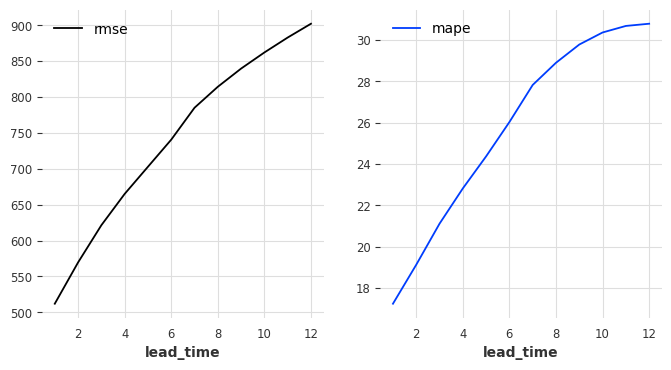

In [ ]:
df_baseline = pd.DataFrame(
    {
        "rmse": get_rmse(naive_errors),
        "mape": get_mape(naive_errors),
        "model": "baseline",
    }
)